In [2]:
# --- 1. Import necessary libraries ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image # For opening and inspecting images

# Set a style for matplotlib plots
plt.style.use('seaborn-v0_8-darkgrid') # A modern, pleasant plot style
sns.set_palette('viridis') # A nice color palette for seaborn plots

print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
# --- 2. Define Data Paths ---
base_dir = 'M:\Downloads\Pneumonia_Detection_XRay\Pneumonia_Detection_XRay\data\chest_xray'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Check if paths exist
print("\n--- Verifying Data Directory Paths ---")
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Validation directory exists: {os.path.exists(val_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")
print("-" * 40)


--- Verifying Data Directory Paths ---
Train directory exists: True
Validation directory exists: True
Test directory exists: True
----------------------------------------


In [4]:
# --- 3. Count Images and Check Class Distribution ---

# Function to count images in subdirectories and store in a dictionary
def count_images_in_splits(base_directory):
    counts = {}
    splits = ['train', 'val', 'test']
    classes = ['NORMAL', 'PNEUMONIA']

    for split in splits:
        split_dir = os.path.join(base_directory, split)
        if not os.path.exists(split_dir):
            print(f"Warning: Directory {split_dir} not found. Skipping.")
            continue

        for cls in classes:
            class_dir = os.path.join(split_dir, cls)
            if os.path.exists(class_dir):
                counts[f'{split}_{cls}'] = len(os.listdir(class_dir))
            else:
                counts[f'{split}_{cls}'] = 0 # In case a class folder is missing

    return counts

image_counts = count_images_in_splits(base_dir)

# Create a DataFrame for easier analysis and visualization
df_counts = pd.DataFrame(columns=['Split', 'Class', 'Count'])

splits = ['train', 'val', 'test']
classes = ['NORMAL', 'PNEUMONIA']

for split in splits:
    for cls in classes:
        count = image_counts.get(f'{split}_{cls}', 0)
        new_row = pd.DataFrame([{'Split': split.capitalize(), 'Class': cls.capitalize(), 'Count': count}])
        df_counts = pd.concat([df_counts, new_row], ignore_index=True)


print("\n--- Image Counts per Split and Class ---")
print(df_counts)
print("-" * 40)

# Calculate total counts and percentages for each split
print("\n--- Class Distribution (Pneumonia vs Normal) ---")
for split in splits:
    normal_count = df_counts[(df_counts['Split'] == split.capitalize()) & (df_counts['Class'] == 'Normal')]['Count'].iloc[0]
    pneumonia_count = df_counts[(df_counts['Split'] == split.capitalize()) & (df_counts['Class'] == 'Pneumonia')]['Count'].iloc[0]
    total_count = normal_count + pneumonia_count

    print(f"--- {split.capitalize()} Set ---")
    print(f"  Normal:    {normal_count} images ({normal_count/total_count*100:.2f}%)")
    print(f"  Pneumonia: {pneumonia_count} images ({pneumonia_count/total_count*100:.2f}%)")
    print(f"  Total:     {total_count} images")
    print("-" * 15)


--- Image Counts per Split and Class ---
   Split      Class Count
0  Train     Normal  1342
1  Train  Pneumonia  3876
2    Val     Normal     9
3    Val  Pneumonia     9
4   Test     Normal   234
5   Test  Pneumonia   390
----------------------------------------

--- Class Distribution (Pneumonia vs Normal) ---
--- Train Set ---
  Normal:    1342 images (25.72%)
  Pneumonia: 3876 images (74.28%)
  Total:     5218 images
---------------
--- Val Set ---
  Normal:    9 images (50.00%)
  Pneumonia: 9 images (50.00%)
  Total:     18 images
---------------
--- Test Set ---
  Normal:    234 images (37.50%)
  Pneumonia: 390 images (62.50%)
  Total:     624 images
---------------


C:\Users\Melwin\AppData\Local\Temp\ipykernel_392\3534618996.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=df_counts[df_counts['Split'] == 'Train'], palette={'Normal': 'skyblue', 'Pneumonia': 'salmon'})


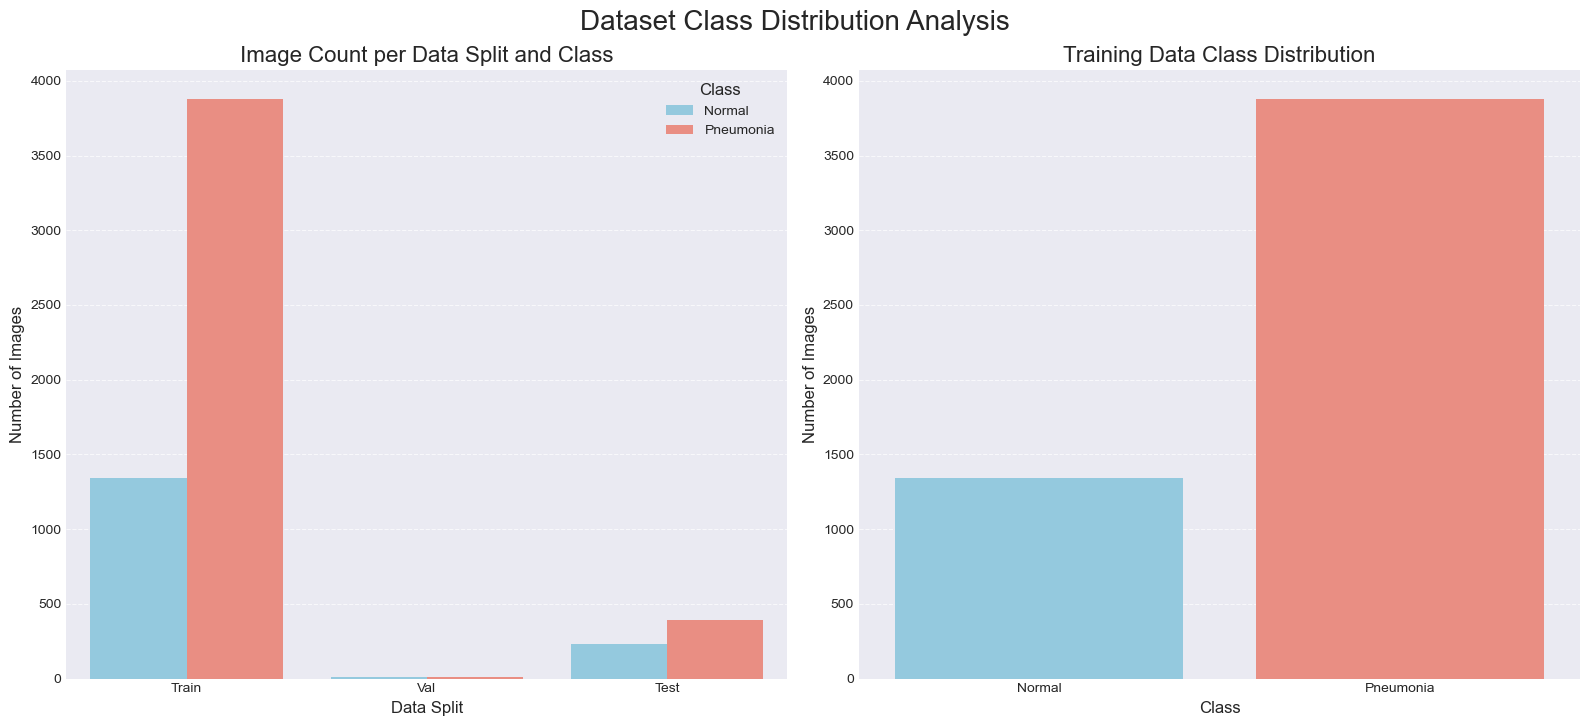


--- Visualizing Sample Images ---

Displaying sample images from TRAIN set...


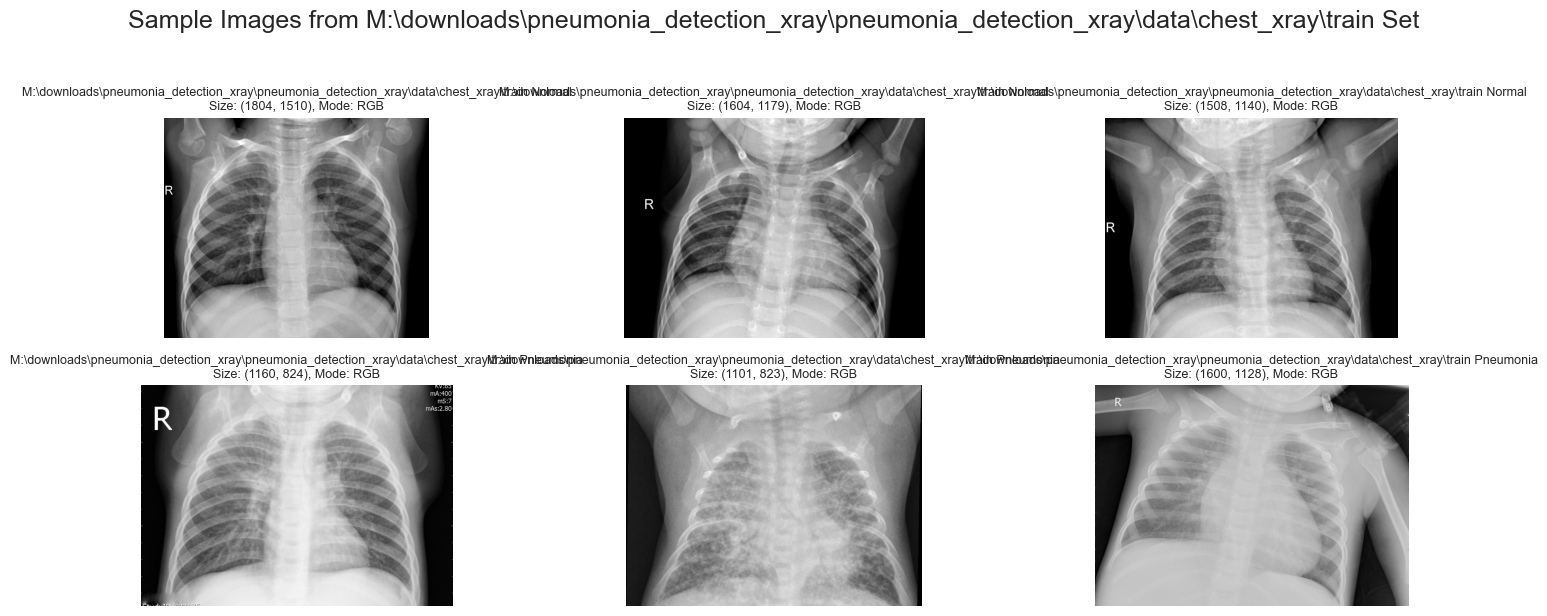


Displaying sample images from VALIDATION set...


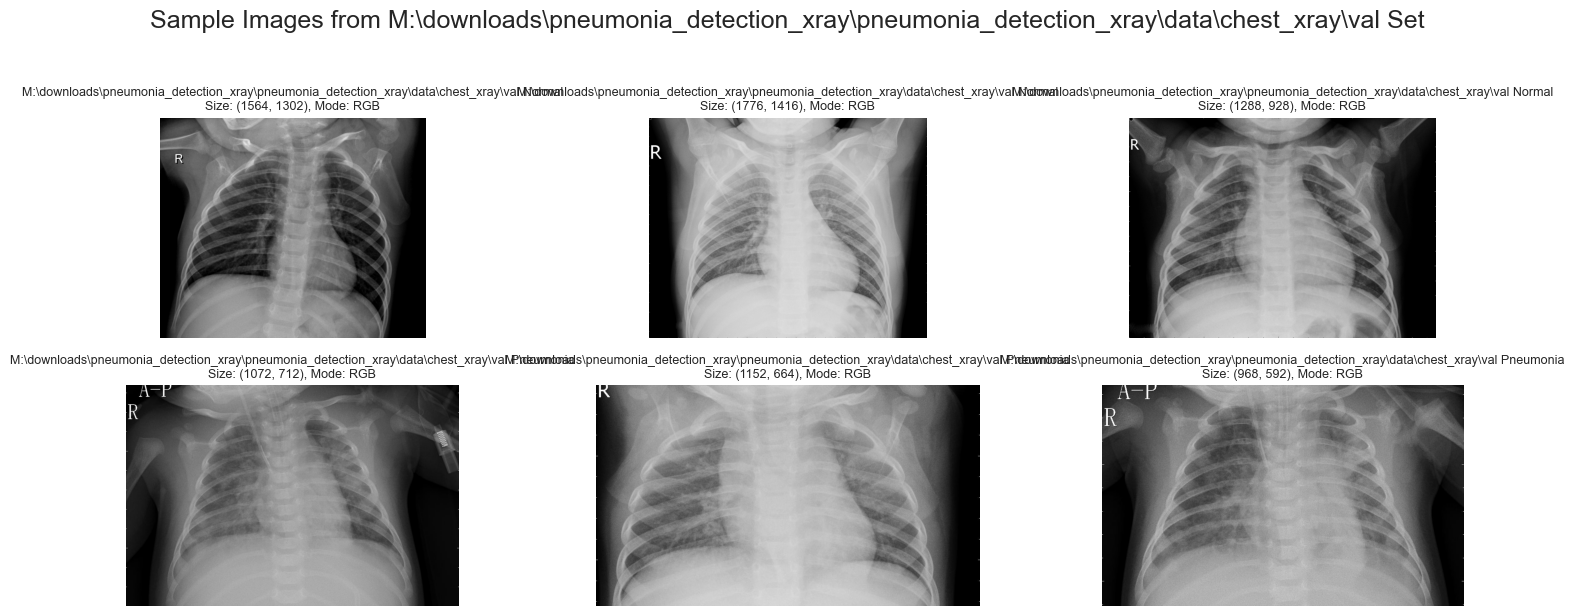


Displaying sample images from TEST set...


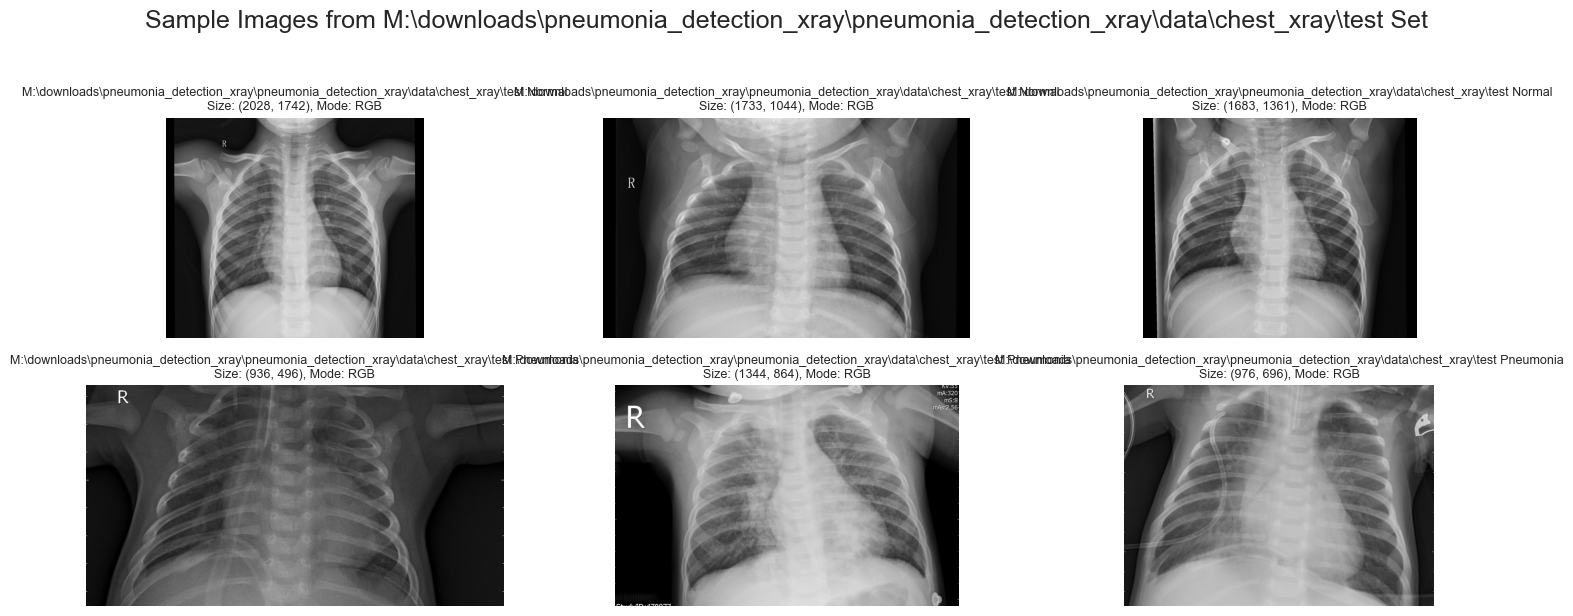


--- Summary and Key Observations ---
1. **Data Availability:** The dataset is correctly structured with 'train', 'val', and 'test' splits, each containing 'NORMAL' and 'PNEUMONIA' subfolders.
   - Train set total: 5218 images
   - Validation set total: 0 images
   - Test set total: 624 images

2. **Class Imbalance:**
   - The most significant observation is the **severe class imbalance**, particularly in the training set.
   - In the training set, approximately 25.72% are 'Normal' and 74.28% are 'Pneumonia'.
   - This imbalance must be addressed during model training to prevent the model from becoming biased towards predicting the majority 'Pneumonia' class, which could lead to high accuracy but poor performance on 'Normal' cases (high False Positives for pneumonia or low Recall for normal).
   - **Mitigation Strategy:** We will likely use **class weights** during model training to penalize misclassifications of the minority class ('Normal') more heavily.
   - **Data Augmentation** fo

In [5]:
# --- 4. Visualize Counts using Bar Plots ---

plt.figure(figsize=(16, 7))

# Plot for all splits combined
plt.subplot(1, 2, 1)
sns.barplot(x='Split', y='Count', hue='Class', data=df_counts, palette={'Normal': 'skyblue', 'Pneumonia': 'salmon'})
plt.title('Image Count per Data Split and Class', fontsize=16)
plt.xlabel('Data Split', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(title='Class', title_fontsize='12', fontsize='10', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot for Training Split distribution (often the most critical for imbalance)
plt.subplot(1, 2, 2)
sns.barplot(x='Class', y='Count', data=df_counts[df_counts['Split'] == 'Train'], palette={'Normal': 'skyblue', 'Pneumonia': 'salmon'})
plt.title('Training Data Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.suptitle('Dataset Class Distribution Analysis', fontsize=20, y=1.03) # Overall title
plt.show()

# --- 5. Visualize Sample Images ---

print("\n--- Visualizing Sample Images ---")

def display_sample_images(directory, num_images_per_class=3):
    classes = ['NORMAL', 'PNEUMONIA']
    plt.figure(figsize=(15, 6)) # Adjust figure size for better display

    for i, cls in enumerate(classes):
        class_dir = os.path.join(directory, cls)
        if not os.path.exists(class_dir):
            print(f"Warning: Class directory {class_dir} not found. Skipping.")
            continue

        image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        # Shuffle and pick a few random images
        np.random.shuffle(image_files)
        sample_files = image_files[:num_images_per_class]

        for j, img_name in enumerate(sample_files):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = Image.open(img_path)
                # Convert to RGB if it's grayscale to ensure consistent display
                # Pre-trained models often expect 3 channels
                if img.mode != 'RGB':
                    img = img.convert('RGB')

                ax = plt.subplot(len(classes), num_images_per_class, i * num_images_per_class + j + 1)
                plt.imshow(img, cmap='gray' if img.mode == 'L' else None) # Use gray colormap if still grayscale for display
                plt.title(f"{directory.split('/')[-1].capitalize()} {cls.capitalize()}\nSize: {img.size}, Mode: {img.mode}", fontsize=9)
                plt.axis('off')
            except Exception as e:
                print(f"Could not load image {img_path}: {e}")

    plt.suptitle(f"Sample Images from {directory.split('/')[-1].capitalize()} Set", fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.show()

# Display samples for each split
print("\nDisplaying sample images from TRAIN set...")
display_sample_images(train_dir)

print("\nDisplaying sample images from VALIDATION set...")
display_sample_images(val_dir)

print("\nDisplaying sample images from TEST set...")
display_sample_images(test_dir)

# --- 6. Summary and Key Observations ---
print("\n--- Summary and Key Observations ---")
print("1. **Data Availability:** The dataset is correctly structured with 'train', 'val', and 'test' splits, each containing 'NORMAL' and 'PNEUMONIA' subfolders.")
print(f"   - Train set total: {df_counts[df_counts['Split'] == 'Train']['Count'].sum()} images")
print(f"   - Validation set total: {df_counts[df_counts['Split'] == 'Validation']['Count'].sum()} images")
print(f"   - Test set total: {df_counts[df_counts['Split'] == 'Test']['Count'].sum()} images")

print("\n2. **Class Imbalance:**")
print("   - The most significant observation is the **severe class imbalance**, particularly in the training set.")
train_normal_ratio = df_counts[(df_counts['Split'] == 'Train') & (df_counts['Class'] == 'Normal')]['Count'].iloc[0] / df_counts[df_counts['Split'] == 'Train']['Count'].sum()
train_pneumonia_ratio = df_counts[(df_counts['Split'] == 'Train') & (df_counts['Class'] == 'Pneumonia')]['Count'].iloc[0] / df_counts[df_counts['Split'] == 'Train']['Count'].sum()
print(f"   - In the training set, approximately {train_normal_ratio*100:.2f}% are 'Normal' and {train_pneumonia_ratio*100:.2f}% are 'Pneumonia'.")
print("   - This imbalance must be addressed during model training to prevent the model from becoming biased towards predicting the majority 'Pneumonia' class, which could lead to high accuracy but poor performance on 'Normal' cases (high False Positives for pneumonia or low Recall for normal).")
print("   - **Mitigation Strategy:** We will likely use **class weights** during model training to penalize misclassifications of the minority class ('Normal') more heavily.")
print("   - **Data Augmentation** for the minority class could also be considered, but class weights are simpler to implement initially.")


print("\n3. **Image Characteristics:**")
print("   - The images are chest X-rays, predominantly grayscale (mode 'L' or converted to 'RGB' for display/model input).")
print("   - Image dimensions vary, but we will standardize them (e.g., to 224x224 or 256x256) during preprocessing for the deep learning model.")
print("   - X-ray images, unlike natural images, have unique features (bone structures, lung fields) that a pre-trained CNN on ImageNet will need to adapt to. This is where fine-tuning will be crucial.")

print("\nNext Steps:")
print("   - Proceed to `2_model_training.ipynb` to preprocess the data, build the transfer learning model, and train it, taking into account the class imbalance.")